In [1]:
import pickle
import logging
import pickle
import random
from copy import copy
from typing import Any, Callable, Optional

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pm4py
import pm4py.ocel
import torch
import torch_geometric as tg
import torch_geometric.utils as utils
from pm4py.algo.transformation.ocel.features.objects import (
    algorithm as object_feature_factory,
)
from torch import Tensor
from torch_geometric.data import HeteroData
from torch_geometric.datasets import FakeHeteroDataset
from torch_geometric.typing import (
    DEFAULT_REL,
    EdgeTensorType,
    EdgeType,
    FeatureTensorType,
    NodeType,
    QueryType,
    SparseTensor,
)


/home/tim/Development/OCPPM/.env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('../data/BPI17/feature_encodings/BPI17_OFG.pkl', 'rb') as hetero_data_pkl:
    hetero_data = pickle.load(hetero_data_pkl)

In [3]:
hetero_data["application", "interacts with", "offer"]

{}

In [4]:
G = nx.Graph()
G.add_edges_from(graph)
some_graph = {x for x in graph if "Application_2114646933" in x}
sorted_cc = sorted(list(nx.connected_components(G)), key=len, reverse=True)
sg = G.subgraph(sorted_cc[4])
# sg = nx.Graph()
# sg.add_edges_from(some_graph_adjacency)
nx.draw(sg, with_labels=True)
plt.savefig("../../tests/objects_interaction_graph.png")

NameError: name 'graph' is not defined

In [5]:
from torch_geometric.datasets import OGB_MAG

dataset = OGB_MAG(root="./data", preprocess="metapath2vec")
citation_network = dataset[0]
citation_network

HeteroData(
  paper={
    x=[736389, 128],
    year=[736389],
    y=[736389],
    train_mask=[736389],
    val_mask=[736389],
    test_mask=[736389]
  },
  author={ x=[1134649, 128] },
  institution={ x=[8740, 128] },
  field_of_study={ x=[59965, 128] },
  (author, affiliated_with, institution)={ edge_index=[2, 1043998] },
  (author, writes, paper)={ edge_index=[2, 7145660] },
  (paper, cites, paper)={ edge_index=[2, 5416271] },
  (paper, has_topic, field_of_study)={ edge_index=[2, 7505078] }
)

In [6]:
dataset.num_classes

349

In [8]:
# testing to check whether we can indicate correct nodes from each node type in the edge_index
orders = {"price": [1250, 678], "discount": [33, 0], "black_friday_sale": [1, 0]}
items = {"weight": [3.5, 3.0, 26.0], "size": [2, 2, 3]}
order_x_tensor = torch.tensor(list(orders.values()))[1:].T
order_y_tensor = torch.tensor(list(orders.values()))[
    0
].T  # order_price will be the target
item_x_tensor = torch.tensor(list(items.values())).T
# o_o_interaction = torch.tensor([[],[]])
o_i_interaction = torch.tensor(
    [[0, 0, 1], [0, 1, 2]]
)  # directional (only from order to item)
i_i_interaction = torch.tensor([[2, 1], [1, 2]])
test_het = HeteroData(
    {"order": {"x": order_x_tensor, "y": order_y_tensor}, "item": {"x": item_x_tensor}},
    #   order__interacts_with__order={'edge_index': o_o_interaction},
    order__interacts_with__item={"edge_index": o_i_interaction},
    item__interacts_with__item={"edge_index": i_i_interaction},
)

/tmp/ipykernel_5995/2265959475.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  order_y_tensor = torch.tensor(list(orders.values()))[


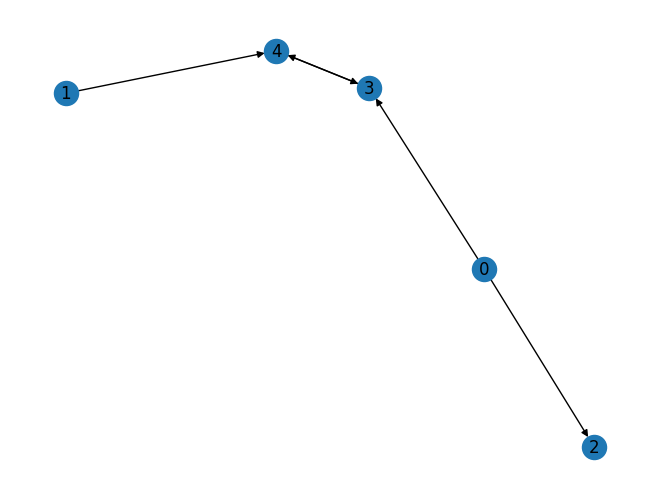

In [9]:
test_het
g = utils.to_networkx(test_het.to_homogeneous(), to_undirected=False)
nx.draw(g, with_labels=True)

In [ ]:
fake_het = FakeHeteroDataset(
    num_node_types=2,
    num_edge_types=3,
    avg_num_nodes=2.5,
    num_classes=2,
    avg_degree=1,
    avg_num_channels=3,
)
fake_het = fake_het[0]
# fake_het.generate_ids()
fake_het

In [ ]:
fake_het["v0"]

In [ ]:
fake_het
fake_het.to_dict()

In [ ]:
fake_het["(v1, e0, v1)"]

In [ ]:
# define a format for the adjacency matrix (use real oid or custom object_index?)

In [ ]:
# Define HeteroData in PyG, using offer_features, application_features, and the adjacency matrix

In [ ]:
# build OFG class that can hold features
# enable this class to be ported to PyG


In [ ]:
# COULD MOVE THIS TO A UNIT TEST FILE
# example_edges = [('o1','i1'),('o1','i2'),('i2','i3'),('i3','o2')]
# test_split = split_on_edge_types(edge_list=to_undirected(example_edges), edge_types=[('o','i'), ('i','i')])
# test_split
